In [18]:
import cv2
import matplotlib.pyplot as plt
import dlib
import numpy
import os

(<Axes: >, <matplotlib.image.AxesImage at 0x121b62b50>)

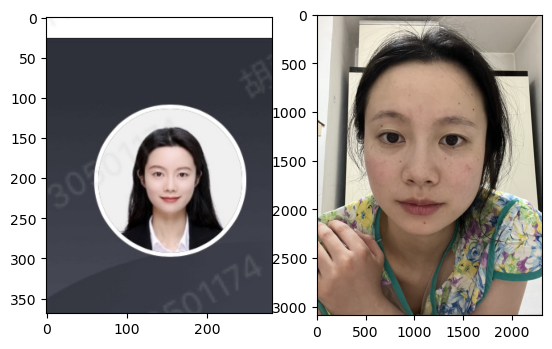

In [19]:
dd1 = '/Users/outianyi/Computer_Vision/dd1.jpeg'
dd2 = '/Users/outianyi/Computer_Vision/dd2.jpeg'
img1 = cv2.imread(dd1, cv2.IMREAD_COLOR)
img2 = cv2.imread(dd2, cv2.IMREAD_COLOR)
plt.subplot(121), plt.imshow(img1[:, :, ::-1])
plt.subplot(122), plt.imshow(img2[:, :, ::-1])

In [20]:
detector = dlib.get_frontal_face_detector()
facerec_model = "/Users/outianyi/Computer_Vision/dlib_face_recognition_resnet_model_v1.dat"
face_recognizer = dlib.face_recognition_model_v1(facerec_model)
model = '/Users/outianyi/Computer_Vision/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model)

In [21]:
# compute descriptor
def compute_des(img):
    face = detector(img, 1)
    face = face[0]
    shape = predictor(img, face)
    face_descriptor = face_recognizer.compute_face_descriptor(img, shape)
    return face_descriptor

In [22]:
des1 = compute_des(img1)
des2 = compute_des(img2)

In [23]:
des1

dlib.vector([-0.0602791, 0.0211554, 0.0354534, -0.140546, -0.0963465, -0.0232819, -0.0842242, -0.136051, 0.116766, -0.146859, 0.217387, -0.0990071, -0.171729, -0.0547188, -0.0705388, 0.198784, -0.276718, -0.175347, 0.00706401, -0.0178806, 0.0401792, 0.078545, 0.0213463, 0.0825162, -0.145497, -0.334034, -0.105522, -0.0397008, 0.00970822, -0.0457663, -0.0336103, 0.0441922, -0.197668, 0.0292633, 0.0908703, 0.124695, 0.0353307, -0.187727, 0.176056, 0.0223142, -0.25601, 0.0767516, 0.0898614, 0.219991, 0.206376, -0.0608085, -0.0353117, -0.140605, 0.164563, -0.166575, 0.00524968, 0.130518, 0.0369254, -0.017433, -0.0122519, -0.1149, 0.018936, 0.179536, -0.156124, -0.0557747, 0.0719055, -0.0597349, 0.0498471, -0.112282, 0.114875, 0.10618, -0.0882249, -0.263738, 0.116025, -0.182618, -0.0747988, 0.0818472, -0.146303, -0.161247, -0.242224, -0.0435005, 0.323872, 0.102529, -0.170686, 0.0724605, 0.0388798, 0.00122176, 0.142107, 0.167989, 0.0162051, 0.0314583, -0.107669, 0.0101613, 0.288457, -0.013382

In [24]:
des2

dlib.vector([-0.0774472, 0.063836, 0.0365339, -0.0696432, -0.0647221, -0.0133834, -0.0759147, -0.113162, 0.149699, -0.122731, 0.197408, -0.0745685, -0.215712, -0.0329871, 0.00405852, 0.213826, -0.211549, -0.16095, -0.0254712, 0.015025, 0.0656574, 0.0318708, 0.0242042, 0.0729195, -0.125892, -0.353693, -0.122411, -0.0718238, -0.00893169, -0.064632, -0.0874496, 0.0233629, -0.163017, -0.0124694, 0.0657156, 0.132857, -0.0262885, -0.170843, 0.163679, 0.0398905, -0.266308, 0.0870111, 0.0228819, 0.201853, 0.159412, 0.0252939, 0.0178666, -0.159796, 0.147395, -0.139722, -0.00840972, 0.160129, 0.0448324, 0.0531223, -0.0088312, -0.147357, 0.0526851, 0.0993634, -0.170632, -0.0689382, 0.0987002, -0.0254744, 0.0503358, -0.114189, 0.176125, 0.108653, -0.126969, -0.192377, 0.104717, -0.118936, -0.0635132, 0.0779052, -0.182477, -0.204087, -0.196985, -0.00489114, 0.393238, 0.0959175, -0.156777, 0.0368315, -0.0201484, -0.0311317, 0.0926567, 0.202896, 0.0190249, 0.0370549, -0.0772141, 0.0187033, 0.243346, 

In [25]:
import numpy as np
# 计算距离的函数（欧式距离）
def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b), ord=2)

In [26]:
distance(des1, des2)

0.4144258613447219

In [27]:
def calc_cos(a, b):
    dot = np.sum(np.multiply(a, b))
    norm = np.linalg.norm(a) * np.linalg.norm(b)
    return dot / norm

In [28]:
calc_cos(des1, des2)

0.9552202368854658